# 決定木を理解する

In [87]:
data = [
    'I am Mohammed Abacha, the son of the late Nigerian Head of ' 
    'State who died on the 8th of June 1998. Since i have been ' 
    'unsuccessful in locating the relatives for over 2 years now ' 
    'I seek your consent to present you as the next of kin so ' 
    'that the proceeds of this account valued at US$15.5 Million ' 
    'Dollars can be paid to you. If you are capable and willing ' 
    'to assist, contact me at once via email with following ' 
    'details: 1. Your full name, address, and telephone number. ' 
    '2. Your Bank Name, Address. 3.Your Bank Account Number and ' 
    'Beneficiary Name - You must be the signatory.'
]

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(data)

In [128]:
vec.get_feature_names_out()

array(['BP=high', 'BP=low', 'BP=normal', 'K', 'Na', 'age',
       'cholesterol=high', 'cholesterol=normal', 'sex=F', 'sex=M'],
      dtype=object)

In [90]:
X.toarray()[0, :5]

array([1, 1, 1, 1, 2])

In [91]:
'nigerian' in vec.get_feature_names()

True

In [92]:
'prince' in vec.get_feature_names()

False

#### 決定木の構築

In [93]:
data = [
    {'age': 33, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.66, 'K': 0.06, 'drug': 'A'}, 
    {'age': 77, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.19, 'K': 0.03, 'drug': 'D'}, 
    {'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.80, 'K': 0.05, 'drug': 'B'}, 
    {'age': 39, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.19, 'K': 0.02, 'drug': 'C'}, 
    {'age': 43, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'high', 'Na': 0.36, 'K': 0.03, 'drug': 'D'}, 
    {'age': 82, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.09, 'K': 0.09, 'drug': 'C'}, 
    {'age': 40, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.89, 'K': 0.02, 'drug': 'A'}, 
    {'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.80, 'K': 0.05, 'drug': 'B'}, 
    {'age': 29, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.35, 'K': 0.04, 'drug': 'D'}, 
    {'age': 53, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.54, 'K': 0.06, 'drug': 'C'}, 
    {'age': 36, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.53, 'K': 0.05, 'drug': 'A'}, 
    {'age': 63, 'sex': 'M', 'BP': 'low', 'cholesterol': 'high', 'Na': 0.86, 'K': 0.09, 'drug': 'B'}, 
    {'age': 60, 'sex': 'M', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.66, 'K': 0.04, 'drug': 'C'}, 
    {'age': 55, 'sex': 'M', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.82, 'K': 0.04, 'drug': 'B'}, 
    {'age': 35, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'high', 'Na': 0.27, 'K': 0.03, 'drug': 'D'}, 
    {'age': 23, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.55, 'K': 0.08, 'drug': 'A'}, 
    {'age': 49, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.27, 'K': 0.05, 'drug': 'C'}, 
    {'age': 27, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.77, 'K': 0.02, 'drug': 'B'}, 
    {'age': 51, 'sex': 'F', 'BP': 'low', 'cholesterol': 'high', 'Na': 0.20, 'K': 0.02, 'drug': 'D'}, 
    {'age': 38, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.78, 'K': 0.05, 'drug': 'A'}
]

In [94]:
target = [d['drug'] for d in data]
target

['A',
 'D',
 'B',
 'C',
 'D',
 'C',
 'A',
 'B',
 'D',
 'C',
 'A',
 'B',
 'C',
 'B',
 'D',
 'A',
 'C',
 'B',
 'D',
 'A']

In [95]:
[d.pop('drug') for d in data];

In [96]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [97]:
age = [d['age'] for d in data]
age

[33,
 77,
 88,
 39,
 43,
 82,
 40,
 88,
 29,
 53,
 36,
 63,
 60,
 55,
 35,
 23,
 49,
 27,
 51,
 38]

In [98]:
sodium = [d['Na'] for d in data]
potassium = [d['K'] for d in data]

Text(0, 0.5, 'potassium')

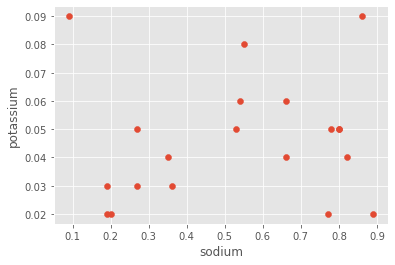

In [99]:
plt.scatter(sodium, potassium)
plt.xlabel('sodium')
plt.ylabel('potassium')

In [100]:
target = [ord(t)-65 for t in target]
target

[0, 3, 1, 2, 3, 2, 0, 1, 3, 2, 0, 1, 2, 1, 3, 0, 2, 1, 3, 0]

Text(0, 0.5, 'sodium (Na)')

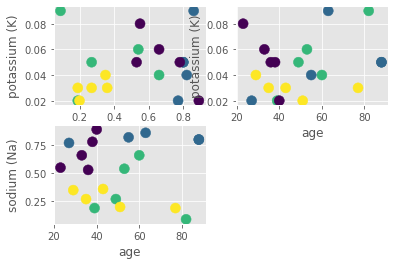

In [101]:
plt.subplot(221)
plt.scatter(sodium, potassium, c=target, s=100)
plt.xlabel('sodium (Na)')
plt.ylabel('potassium (K)')
plt.subplot(222)
plt.scatter(age, potassium, c=target, s=100)
plt.xlabel('age')
plt.ylabel('potassium (K)')
plt.subplot(223)
plt.scatter(age, sodium, c=target, s=100)
plt.xlabel('age')
plt.ylabel('sodium (Na)')

#### データの事前処理を行う

In [102]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
data_pre = vec.fit_transform(data)

In [103]:
vec.get_feature_names_out()

array(['BP=high', 'BP=low', 'BP=normal', 'K', 'Na', 'age',
       'cholesterol=high', 'cholesterol=normal', 'sex=F', 'sex=M'],
      dtype=object)

In [104]:
data_pre[0]

array([ 1.  ,  0.  ,  0.  ,  0.06,  0.66, 33.  ,  1.  ,  0.  ,  1.  ,
        0.  ])

In [130]:
import numpy as np
data_pre = np.array(data_pre, dtype=np.float32)
target = np.array(target, dtype=np.float32).reshape((-1, 1))

In [131]:
data_pre.shape, target.shape

((20, 10), (20, 1))

In [132]:
target

array([[0.],
       [3.],
       [1.],
       [2.],
       [3.],
       [2.],
       [0.],
       [1.],
       [3.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [3.],
       [0.],
       [2.],
       [1.],
       [3.],
       [0.]], dtype=float32)

In [133]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(data_pre, target, test_size=5, random_state=42)

#### 決定木を組み立てる 

In [134]:
import cv2
dtree = cv2.ml.DTrees_create()

In [135]:
dtree.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

error: allocator<T>::allocate(size_t n) 'n' exceeds maximum supported size

In [ ]:
y_pred = dtree.predict(X_test)

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, dtree.predict(X_test))

In [ ]:
metrics.accuracy_score(y_train, dtree.predict(X_train))

#### 訓練した決定木を可視化する

In [ ]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

In [ ]:
dtc.score(X_train, y_train)

In [ ]:
dtc.score(X_test, y_test)

In [ ]:
dtc.feature_importances_

In [ ]:
plt.barh(range(10), dtc.feature_importances_, align='center', tick_label=vec.get_feature_names())

#### 決定規則の理解

In [ ]:
dtc_entropy = tree.DecisionTreeClassifier(criterion='entropy')